## Laboratorio de Clustering: K-means y Aglomerativo

#### Fecha: 12-may-2023 11:55 PM

#### Nombre de Estudiantes

#### BRAYAM DAVID RICARDO TORRES - DIEGO ALEJANDRO VARGAS ANDRADE

#### Librerias

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Libreria para gráficas
import seaborn as sns

# Libreria para generar datos
from sklearn.datasets import make_blobs
# Libreria para el escalado de variables
from sklearn.preprocessing import scale
# Libreria para las funciones de distancia
from sklearn.metrics import pairwise_distances
# Librería para K-Means
from sklearn.cluster import KMeans
# Libreria para generar el dendograma
from scipy.cluster.hierarchy import dendrogram, linkage
# Libreria para el agrupamiento Aglomerativo
from sklearn.cluster import AgglomerativeClustering
# Librería para separar los datos de entrenamiento y de pruebas
from sklearn.model_selection import train_test_split

#### ---------------------------------------------------------------------------------
#### Ejercicio 1: K-means

Con base al conjunto de datos Iris.csv, realice las siguientes tareas:

- Escalado de las variables.
- Calcule la distancia Euclidiana.
- Imprima las 5 mejores observaciones (menor distancia).

In [173]:
# Se cargan los datos
datos = pd.read_csv("data/Iris.csv")
datos.head(4)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa


In [174]:
# Se cambia el indice del DataFrame por el nombre de la especie
datos= datos.set_index('Species')
datos.head(4)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,1,5.1,3.5,1.4,0.2
Iris-setosa,2,4.9,3.0,1.4,0.2
Iris-setosa,3,4.7,3.2,1.3,0.2
Iris-setosa,4,4.6,3.1,1.5,0.2


#### Solución: 

In [175]:
# TAREA 1: 
#### INSERTE SU CÓDIGO AQUÍ ####
# Escalado de las variables
datos_scaled = scale(X=datos, axis=0, with_mean=True, with_std=True) 
datos_scaled = pd.DataFrame(datos_scaled, columns=datos.columns, index=datos.index)
datos_scaled.head(4)

#### FIN CÓDIGO INSERTADO ####

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,-1.720542,-0.900681,1.032057,-1.341272,-1.312977
Iris-setosa,-1.697448,-1.143017,-0.124958,-1.341272,-1.312977
Iris-setosa,-1.674353,-1.385353,0.337848,-1.398138,-1.312977
Iris-setosa,-1.651258,-1.506521,0.106445,-1.284407,-1.312977


In [176]:
# TAREA 2: 
#### INSERTE SU CÓDIGO AQUÍ ####
# Cálculo de distancias
print('------------------')
print('Distancia Euclídiana')
print('------------------')
distancias = pairwise_distances(
                X = datos_scaled,
                metric ='euclidean'
             )

# Se descarta la diagonal superior de la matriz
distancias[np.triu_indices(n=distancias.shape[0])] = np.nan

distancias = pd.DataFrame(
                distancias,
                columns=datos_scaled.index,
                index = datos_scaled.index
            )

distancias.iloc[:4,:4]

#### FIN CÓDIGO INSERTADO ####

------------------
Distancia Euclídiana
------------------


Species,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa
Species,,,,
Iris-setosa,NaN,NaN,NaN,NaN
Iris-setosa,1.182347,NaN,NaN,NaN
Iris-setosa,0.849823,0.526007,NaN,NaN
Iris-setosa,1.109880,0.437092,0.285827,NaN


In [177]:
# TAREA 3: 
#### INSERTE SU CÓDIGO AQUÍ ####
distancias.melt(ignore_index=False, var_name="caracteristica_b", value_name='distancia') \
    .rename_axis("caracteristica_a") \
    .reset_index() \
    .sort_values('distancia') \
    .dropna()\
    .head(5)

#### FIN CÓDIGO INSERTADO ####

,caracteristica_a,caracteristica_b,distancia
5137,Iris-setosa,Iris-setosa,0.069284
12081,Iris-versicolor,Iris-versicolor,0.145094
19332,Iris-virginica,Iris-virginica,0.160682
4534,Iris-setosa,Iris-setosa,0.209127
4078,Iris-setosa,Iris-setosa,0.239404


#### ---------------------------------------------------------------------------------
#### Ejercicio 2: K-means

Con base al set de datos Iris.csv, realice las siguientes tareas:

- Aplique el método del códo para identificar la cantidad de clusters.
- Realice la predicción K-means y utilice el número de clusters identificado en el método del codo.
- Visualice los grupos.
#### Solución: 

In [178]:
# Se cargan los datos
data = pd.read_csv("data/Iris.csv")
data.head(4)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa


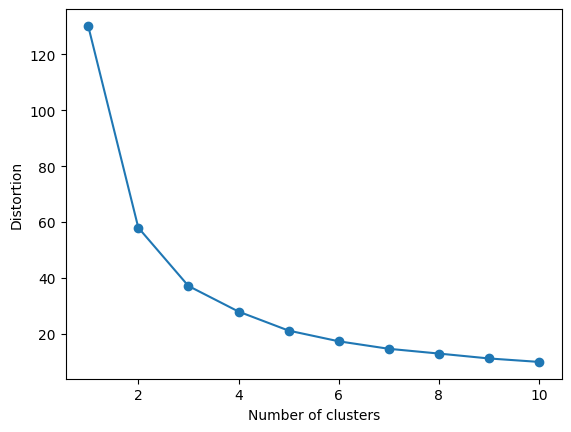

In [179]:
# TAREA 1: 
#### INSERTE SU CÓDIGO AQUÍ ####
columns= ['SepalLengthCm','SepalWidthCm']
X = data[columns].values
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# Se genera la gráfica del codo
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

#### FIN CÓDIGO INSERTADO ####


In [180]:
# TAREA 2: 
#### INSERTE SU CÓDIGO AQUÍ ####
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

# Se genera a predicción
y_predict = km.fit_predict(X)
print(y_predict)
#### FIN CÓDIGO INSERTADO ####

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 2 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 2 2 2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


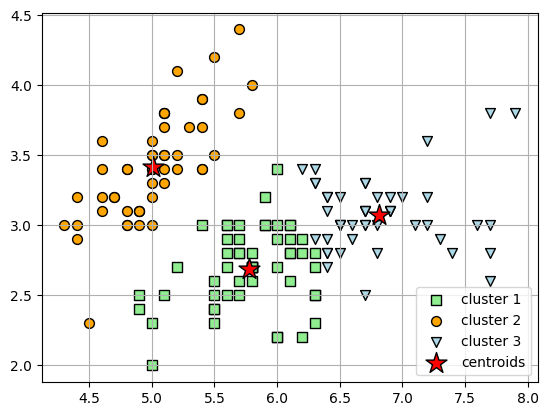

In [181]:
# TAREA 3: 
#### INSERTE SU CÓDIGO AQUÍ ####
# Cluster 1
plt.scatter(
    X[y_predict == 0, 0], X[y_predict == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)
# Cluster 2
plt.scatter(
    X[y_predict == 1, 0], X[y_predict == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)
# Cluster 3
plt.scatter(
    X[y_predict == 2, 0], X[y_predict == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# Se grafican los centroides
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.legend(scatterpoints=1, loc='lower right')
plt.grid()
plt.show()

#### FIN CÓDIGO INSERTADO ####

#### ---------------------------------------------------------------------------------
#### Ejercicio 3: Aglomerativo

Teniendo en cuenta la creación de datos, dendograma y AgglomerativeClustering realice las siguientes tareas:

- Genere 150 datos aleatorios con 3 centros y 3 características
- Utilice la función scipy para generar el dendograma
- Ahora utilice el algoritmo AgglomerativeClustering, realice la predicción y genera la respectiva gráfica de los grupos

#### Solución: 

In [182]:
# TAREA 1
#### INSERTE SU CÓDIGO AQUÍ ####
X, y = make_blobs(n_samples=150, centers=3, n_features=3)

# Se cargan en un DataFrame
data = pd.DataFrame(X, y)
# Se cambia el nombre de las columnas
data = data.rename(columns={0:"X1", 1:"X2", 2:"X3"})

data.head(150)
#### FIN CÓDIGO INSERTADO ####

,X1,X2,X3
0,-5.266789,-7.318328,9.115782
1,5.302355,7.025301,7.821723
0,-7.556740,-8.065495,6.727738
1,6.402417,5.827924,7.795551
2,-3.685442,8.655935,-8.663423
...,...,...,...
0,-5.332366,-7.356044,9.610959
1,6.005941,5.983823,6.100296
2,-4.898639,10.760177,-9.462966
1,4.933741,6.577761,6.227473


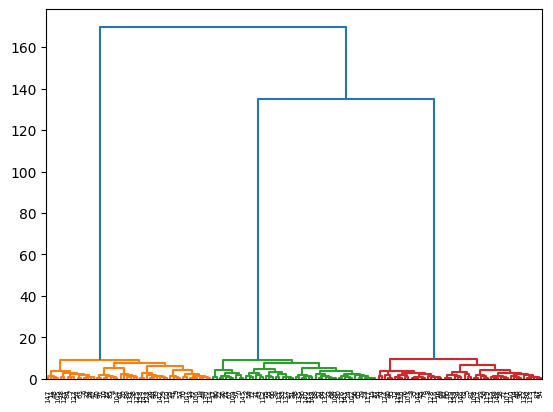

In [183]:
# TAREA 2
#### INSERTE SU CÓDIGO AQUÍ ####
dendograma = dendrogram(linkage(data, method='ward', metric='euclidean'))

#### FIN CÓDIGO INSERTADO ####

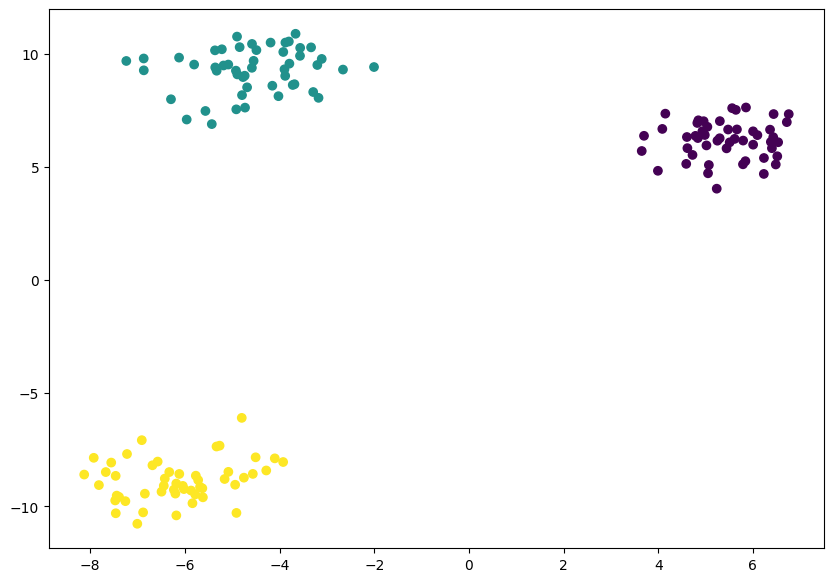

In [184]:
# TAREA 3
#### INSERTE SU CÓDIGO AQUÍ ####
ac = AgglomerativeClustering(n_clusters=3, linkage='ward', metric='euclidean')

ac.fit_predict(data)

# Se genera la gráfica
colores =  ac.labels_
plt.figure(figsize=(10,7))
plt.scatter(data['X1'], data['X2'], c=colores)
plt.show()

#### FIN CÓDIGO INSERTADO ####

#### ---------------------------------------------------------------------------------
#### Ejercicio 4: Aglomerativo

Use AgglomerativeClustering de sklearn para agrupar el conjunto de datos make_blobs. Use 3 grupos y enlace como 'ward'.

In [185]:
# Se generan los datos aleatorios
X, y = make_blobs(n_samples = 1000, random_state=8)

# Se crea un DataFrame con los datos generados
data = pd.DataFrame({'X0': X[:,0], 'X1': X[:,1], 'Y':y})

#### Solución

In [186]:
#### INSERTE SU CÓDIGO AQUÍ ####
ac = AgglomerativeClustering(n_clusters=3,linkage='ward')
ac.fit(X)
data['aglomerativo'] = ac.labels_
data.head(1000)

#### FIN CÓDIGO INSERTADO ####

,X0,X1,Y,aglomerativo
0,8.622185,1.935796,1,0
1,-4.736710,-7.970958,2,1
2,9.621222,0.925423,1,0
3,6.162095,-0.273254,1,0
4,8.697488,-1.057452,1,0
...,...,...,...,...
995,8.993880,2.203768,1,0
996,-5.082768,-9.644539,2,1
997,-6.252268,-8.412482,2,1
998,-5.479154,-10.536955,2,1


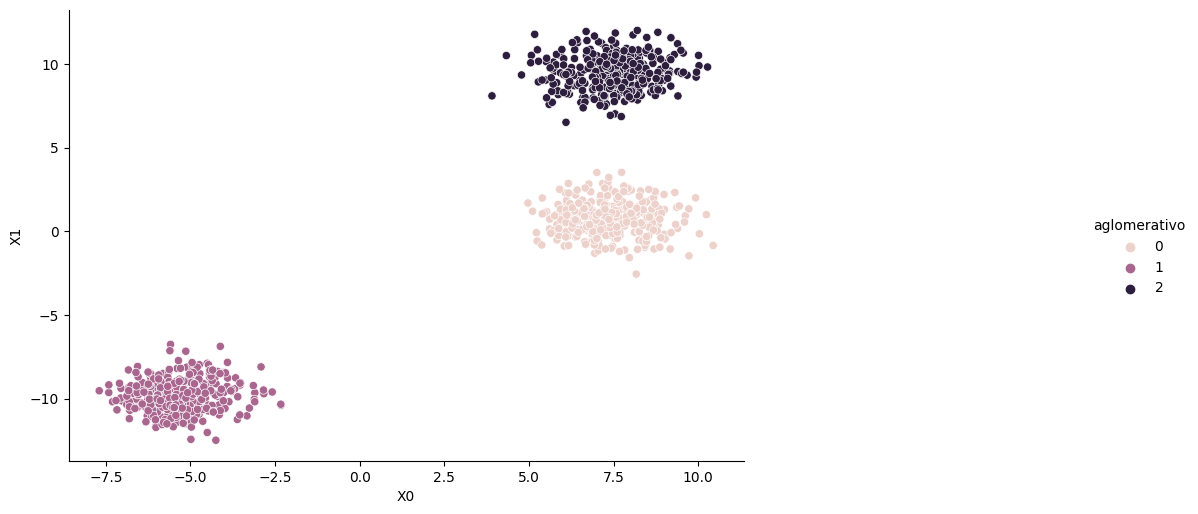

In [187]:
#### INSERTE SU CÓDIGO AQUÍ ####
grafic = sns.pairplot(x_vars="X0", y_vars="X1", hue="aglomerativo", data=data)
grafic.fig.set_size_inches(14, 6)
sns.despine()
#### FIN CÓDIGO INSERTADO ####

#### ---------------------------------------------------------------------------------
#### Ejercicio 5: Aglomerativo

En este ejercicio, use el conjunto de datos de iris después de la división de prueba de entrenamiento, agrupe el conjunto de datos usando AgglomerativeClustering de la biblioteca sklearn. Arregle la mejor opción de vinculación después de probar diferentes opciones.

In [188]:
# Se cargan los datos
iris = pd.read_csv('data/Iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [189]:
# Se definen las características del modelo
caracteristicas = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

# Se separan los datos 80% entrenamiento y 20% para pruebas
iris_train, iris_test = train_test_split(iris, train_size = 0.8)

#### Solución

In [190]:
#### INSERTE SU CÓDIGO AQUÍ ####
ac = AgglomerativeClustering(n_clusters=3, linkage='ward',metric='euclidean').fit(iris_train[caracteristicas])
iris_train = iris_train.assign(cluster = ac.labels_)
iris_train.head(5)

#### FIN CÓDIGO INSERTADO ####

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
18,19,5.7,3.8,1.7,0.3,Iris-setosa,1
108,109,6.7,2.5,5.8,1.8,Iris-virginica,2
75,76,6.6,3.0,4.4,1.4,Iris-versicolor,0
101,102,5.8,2.7,5.1,1.9,Iris-virginica,0
69,70,5.6,2.5,3.9,1.1,Iris-versicolor,0


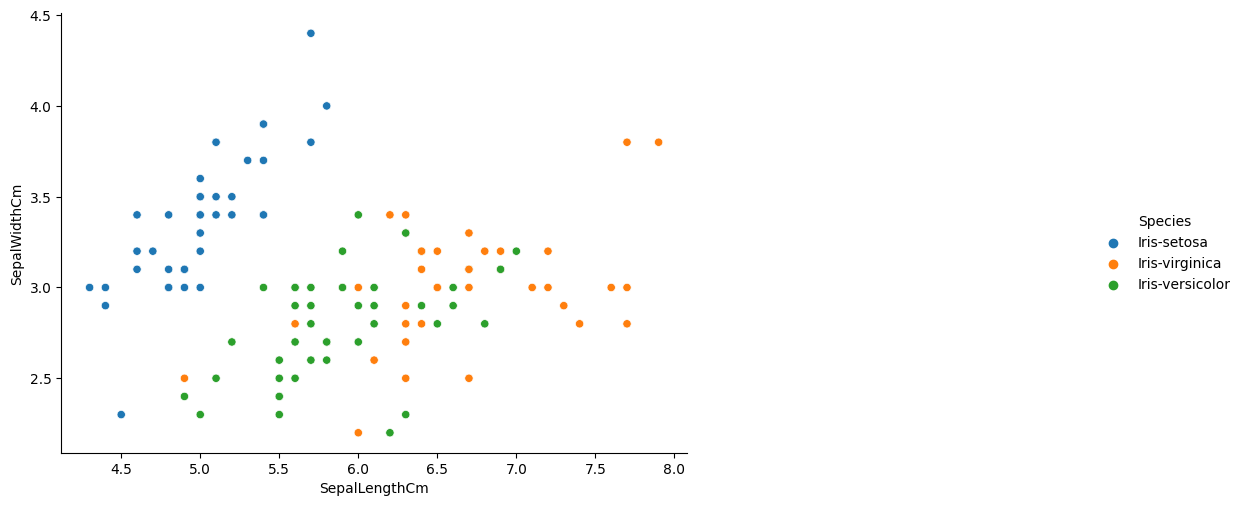

In [191]:
#### INSERTE SU CÓDIGO AQUÍ ####
grafic = sns.pairplot(x_vars="SepalLengthCm", y_vars="SepalWidthCm", hue="Species", data = iris_train)
grafic.fig.set_size_inches(14, 6)

#### FIN CÓDIGO INSERTADO ####